In [1]:
cd

C:\Users\56961


In [2]:
cd Desktop\portafolio

C:\Users\56961\Desktop\portafolio


In [3]:
get_ipython().magic('reset -sf')

C:\Users\56961\AppData\Local\Temp\ipykernel_7208\3674724974.py:1: DeprecationWarning: `magic(...)` is deprecated since IPython 0.13 (warning added in 8.1), use run_line_magic(magic_name, parameter_s).
  get_ipython().magic('reset -sf')


In [4]:

# cargar librerias

# definir librerias
import scipy.stats as st
import random
import numpy as np
import pandas as pd

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sys
import networkx as nx
import pickle 
from collections import Counter
import csv

import networkx.algorithms.isomorphism as iso

import scipy.io as sio
import numpy as np
from datetime import datetime

import seaborn as sns
import pandas as pd
import numpy as np
import io

import warnings
warnings.filterwarnings('ignore', '.*do not.*', )
warnings.warn('DelftStack')
warnings.warn('Do not show this message')
import warnings
warnings.filterwarnings('ignore')

C:\Users\56961\AppData\Local\Temp\ipykernel_7208\3586266814.py:31: UserWarning: DelftStack
  warnings.warn('DelftStack')


# Cargar  data frame con los resultados de la experimentación.

In [5]:
name_df="data frame/df_resumen_exp_reales"
file = open(name_df, 'rb')
df_experimentacion= pickle.load(file)
file.close()

df_experimentacion['Num_metodo_est'] = df_experimentacion['Num_metodo_est'].replace("PIMPLE", "PIMLE")
df_experimentacion['Num_metodo_est'] = df_experimentacion['Num_metodo_est'].replace("EMV", "MLE")

df_experimentacion = df_experimentacion.reset_index(drop=True)                
df_experimentacion.head(2)

,Id_sample,Etiqueta H,Tipo_sample_p_gral,Porc_nodos_muestra,Num_metodo_est,Valor_Estimado,Valor_error(Exac - Est),Valor_error_rel(Exac - Est)
0,0,views<=520,5,0.01,PIMLE,17457.068133,-942.068133,-0.057043
1,0,views<=520,5,0.01,MLE,17314.057061,-799.057061,-0.048384


In [12]:
def graficar_IC(df_experimentacion,l_cond,dict_met_to_ylim,size_figure,l_name_grupo,dict_position_legend,dict_y_lim):
    # Figura: grupo a estimar
    # row: tipo de sample

    # graphicas: los estimadores
    # y label: Err. rel.
    # x label: porc. sample
    L_prop_sample=[0.01,0.1,0.5,0.9]  # row size sample listo
    x_dom=L_prop_sample

    l_tipo_sample=['5', '6', '7', '8']
    cant_filas=len(l_tipo_sample)
    cant_colums=1

    L_met_est=['PIMLE','MLE','GNSUM','RDS_I','RDS_II']   # grafica i #
    cant_graficas=len(L_met_est)
    dict_num_graph_to_est={u:v for u,v in zip(range(cant_graficas),L_met_est)}



    fig, axes = plt.subplots(cant_filas,2, figsize=size_figure, sharex=False, sharey=False)    

    list_ylim=[]
    list_row_col=[]
    #for cond_grupo in l_cond:
    for num_col in range(0,2):    
        label_grupo=l_name_grupo[num_col]
        cond_grupo=l_cond[num_col]
        df_grupo_i=df_experimentacion[cond_grupo]   # no olvidar cambiar  <------
        for num_row in range(cant_filas):     # Tipo_sample_p_gral

            sample_method=l_tipo_sample[num_row]
            df_sample=df_grupo_i[df_grupo_i["Tipo_sample_p_gral"]==sample_method]
            for grafica_i in range(cant_graficas): # metodo estimador

                metodo_est=L_met_est[grafica_i]
                df_graphics=df_sample[df_sample["Num_metodo_est"]==metodo_est]  # grafica_i            

                lista_mean=[]
                l_up_estimador=[]
                for porc_sample in L_prop_sample: # x dom 
                    df_x=df_graphics[df_graphics["Porc_nodos_muestra"]==porc_sample]                
                    datos=list(df_x["Valor_error_rel(Exac - Est)"])                

                    mean_datos=np.mean(datos)
                    lista_mean.append(mean_datos)
                    IC_fix_porc_inf=list(st.t.interval(0.95, len(datos)-1, loc=mean_datos, scale=st.sem(datos)))
                    up_fix_porc_inf=IC_fix_porc_inf[1]-mean_datos
                    l_up_estimador.append(up_fix_porc_inf)

                name_label=metodo_est
                axes[num_row,num_col].scatter(x_dom,lista_mean,s=5,marker='o',label=name_label)   #list_marker=['^','o',"1"]
                axes[num_row,num_col].errorbar(x_dom, lista_mean, yerr=l_up_estimador, fmt='-', linewidth=1)


            ylabel="Err. Rel ( Tipo muestreo "+str(sample_method)+")."
            axes[num_row,num_col].set_ylabel(ylabel,fontsize=14)

            xlabel="Prop. de muestra con resp. a N."
            axes[num_row,num_col].set_xlabel(xlabel,fontsize=14)

            Titulo="IC de la Esp. Er. rel para Est. "+str(label_grupo)+"."
            axes[num_row,num_col].set_title(Titulo)
            
            
            if True:
                ylim=dict_y_lim[num_row,num_col]
                axes[num_row,num_col].set_ylim(ylim)
            
            posit_legend=dict_position_legend[num_row,num_col]
            axes[num_row,num_col].legend(loc=posit_legend,prop={'size': 10}, title ='Mét. estimadores:')
            axes[num_row,num_col].grid(True) 
            list_row_col.append((num_row,num_col))
            list_ylim.append(axes[num_row,num_col].set_ylim())
        if False:
            axes[num_row].set_xlim([-0.1, 1.2])
            
    
    plt.tight_layout()                
    return list_ylim,list_row_col
    

In [13]:
l_grupos=list(df_experimentacion["Etiqueta H"].unique())

L_prop_sample=[0.01,0.1,0.5,0.9]
l_tipo_sample=['5', '6', '7', '8']
list_cuadr_graphics=[]
for i in range(len(l_tipo_sample)):
    for j in range(2):    
        list_cuadr_graphics.append((i,j))
        
list_cuadr_graphics_v2=[]
for j in range(2):    
    for i in range(len(l_tipo_sample)):        
        list_cuadr_graphics_v2.append((i,j))        
list_cuadr_graphics_v2

[(0, 0), (1, 0), (2, 0), (3, 0), (0, 1), (1, 1), (2, 1), (3, 1)]

# Grafica IC caso estimaciones en general

([(-0.2833751542712423, 0.028300479198200328),
  (-0.047477252170575204, 0.055),
  (-0.09194609936649287, 0.22445675398916337),
  (-0.050596620347952155, 0.0684557063087774),
  (-0.18027470965958556, 0.028158968785699356),
  (-0.044176423854506715, 0.0608515145691487),
  (-0.07981245422972304, 0.15077047848924335),
  (-0.04388591827495406, 0.05790657076121412)],
 [(0, 0), (1, 0), (2, 0), (3, 0), (0, 1), (1, 1), (2, 1), (3, 1)])

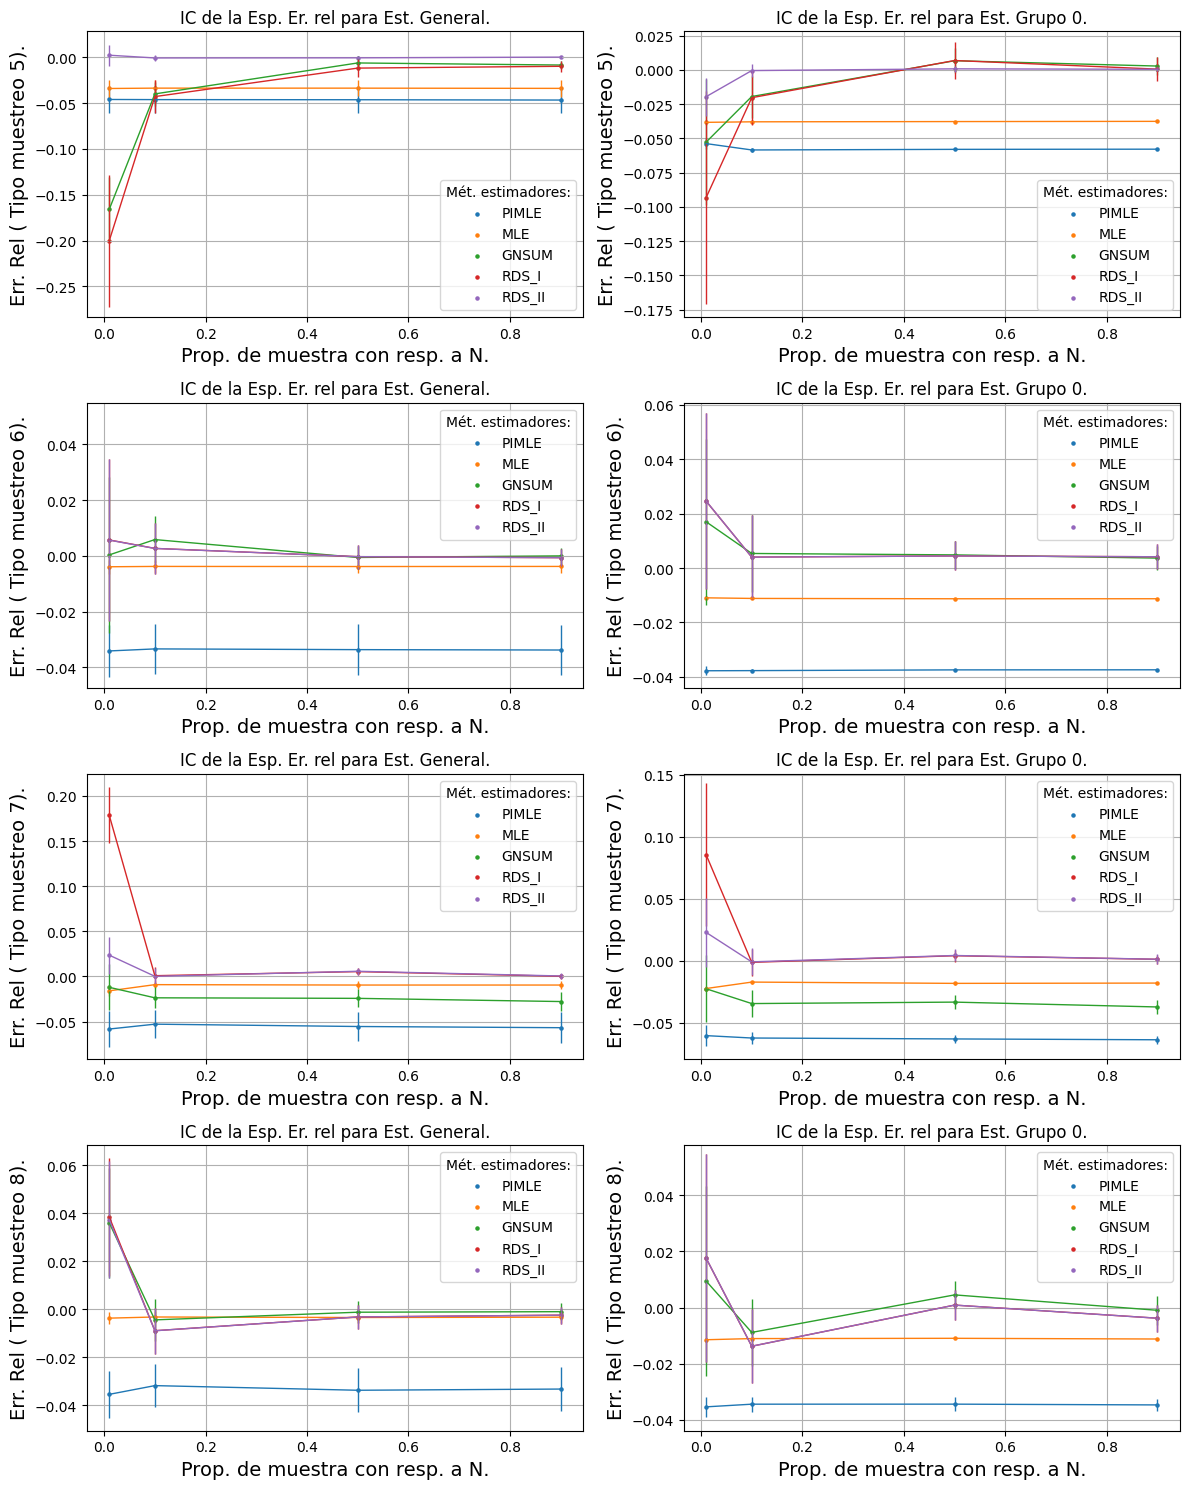

In [14]:
size_figure=(12,15)

# dict_1:
l_ylim=[[-1.5,0.1],[-0.45,0.1],[-0.45,0.1],[-0.45,0.1]]
dict_met_to_ylim={u:v for u,v in zip(L_prop_sample,l_ylim)}

# dict_2:
l_position=["lower right","lower right","upper right","upper right","upper right","upper right","upper right","upper right" ]
dict_position_legend={(u[0],u[1]):z for u,z in zip(list_cuadr_graphics,l_position) }

# dict_3:
l_y_lim=[(-0.2833751542712423, 0.028300479198200328),
  (-0.047477252170575204, 0.055),
  (-0.09194609936649287, 0.22445675398916337),
  (-0.050596620347952155, 0.0684557063087774),
  (-0.18027470965958556, 0.028158968785699356),
  (-0.044176423854506715, 0.0608515145691487),
  (-0.07981245422972304, 0.15077047848924335),
  (-0.04388591827495406, 0.05790657076121412)]
dict_y_lim={(u[0],u[1]):z for u,z in zip(list_cuadr_graphics_v2,l_y_lim) }

cond_grupo_1=df_experimentacion['Etiqueta H']!="10"
cond_grupo_2=df_experimentacion['Etiqueta H']==l_grupos[0]
l_cond=[cond_grupo_1,cond_grupo_2]
l_name_grupo=["General","Grupo 0"]
list_ylim,list_row_col=graficar_IC(df_experimentacion,l_cond,dict_met_to_ylim,size_figure,l_name_grupo,dict_position_legend,dict_y_lim)
list_ylim,list_row_col

([(-0.013162470596091257, 0.033731396522556675),
  (-0.0207166467467697, 0.00829838491957102),
  (-0.01989179516669862, 0.0497283092400225),
  (-0.014158361511535279, 0.01902576182151289),
  (-0.1445318863469801, 0.10267531357274651),
  (-0.07, 0.05480859670296146),
  (-0.025596415155997976, 0.2064429540431813),
  (-0.01650289656494726, 0.17117778406805048)],
 [(0, 0), (1, 0), (2, 0), (3, 0), (0, 1), (1, 1), (2, 1), (3, 1)])

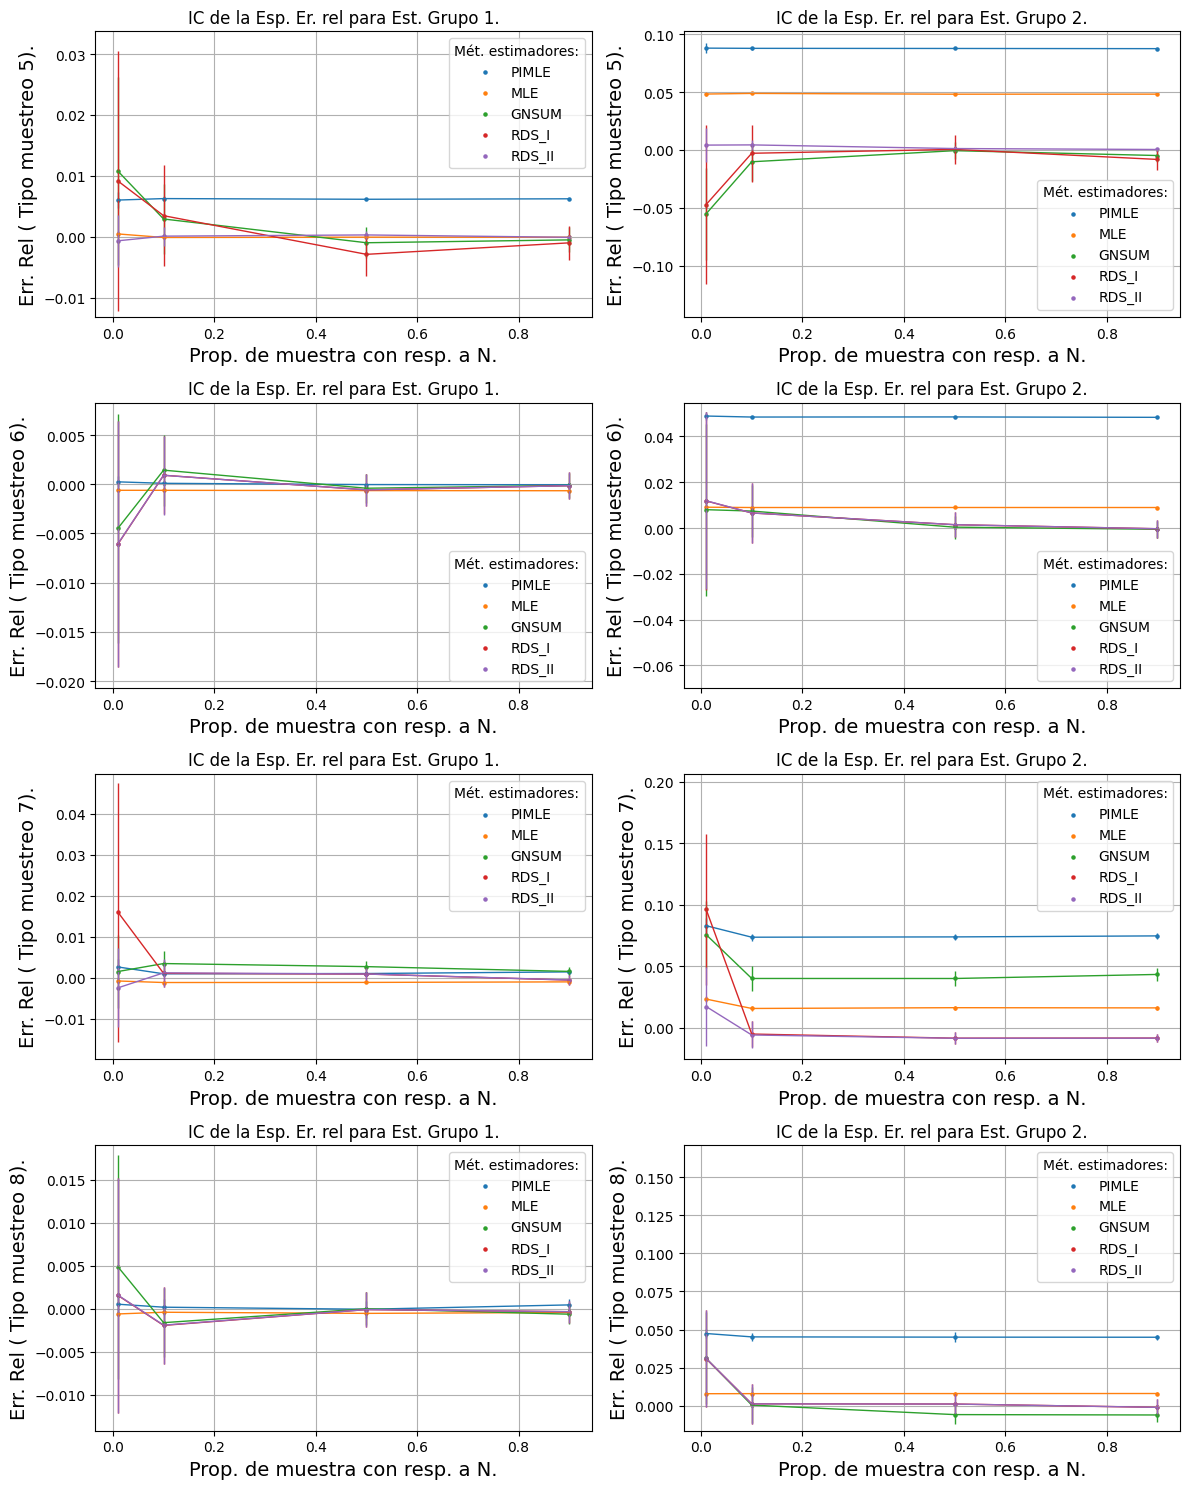

In [15]:
size_figure=(12,15)
l_ylim=[[-1.5,0.1],[-0.45,0.1],[-0.45,0.1],[-0.45,0.1]]
dict_met_to_ylim={u:v for u,v in zip(L_prop_sample,l_ylim)}

# dict_2:
l_position=["upper right","lower right","lower right","lower right","upper right","upper right","upper right","upper right"]
dict_position_legend={(u[0],u[1]):z for u,z in zip(list_cuadr_graphics,l_position) }

# dict_3:
l_y_lim=[(-0.013162470596091257, 0.033731396522556675),
  (-0.0207166467467697, 0.00829838491957102),
  (-0.01989179516669862, 0.0497283092400225),
  (-0.014158361511535279, 0.01902576182151289),
  (-0.14453188634698012, 0.10267531357274651),
  (-0.07, 0.05480859670296146),
  (-0.025596415155997976, 0.2064429540431813),
  (-0.01650289656494726, 0.17117778406805049)]
dict_y_lim={(u[0],u[1]):z for u,z in zip(list_cuadr_graphics_v2,l_y_lim) }

cond_grupo_1=df_experimentacion['Etiqueta H']==l_grupos[1]
cond_grupo_2=df_experimentacion['Etiqueta H']==l_grupos[2]
l_cond=[cond_grupo_1,cond_grupo_2]

l_name_grupo=["Grupo 1","Grupo 2"]
graficar_IC(df_experimentacion,l_cond,dict_met_to_ylim,size_figure,l_name_grupo,dict_position_legend,dict_y_lim)

([(-0.34209466195611027, 0.062394679063943706),
  (-0.11620716121594218, 0.08099313755677157),
  (-0.01471140646460674, 0.31287822666143356),
  (-0.07382975915225008, 0.12264295553226723),
  (-0.03598680310829021, 0.006025494393901969),
  (-0.021300494334075618, 0.0023432225647828176),
  (-0.0181556125573869, 0.130055619822204),
  (-0.020039472993423537, 0.004915317921713292)],
 [(0, 0), (1, 0), (2, 0), (3, 0), (0, 1), (1, 1), (2, 1), (3, 1)])

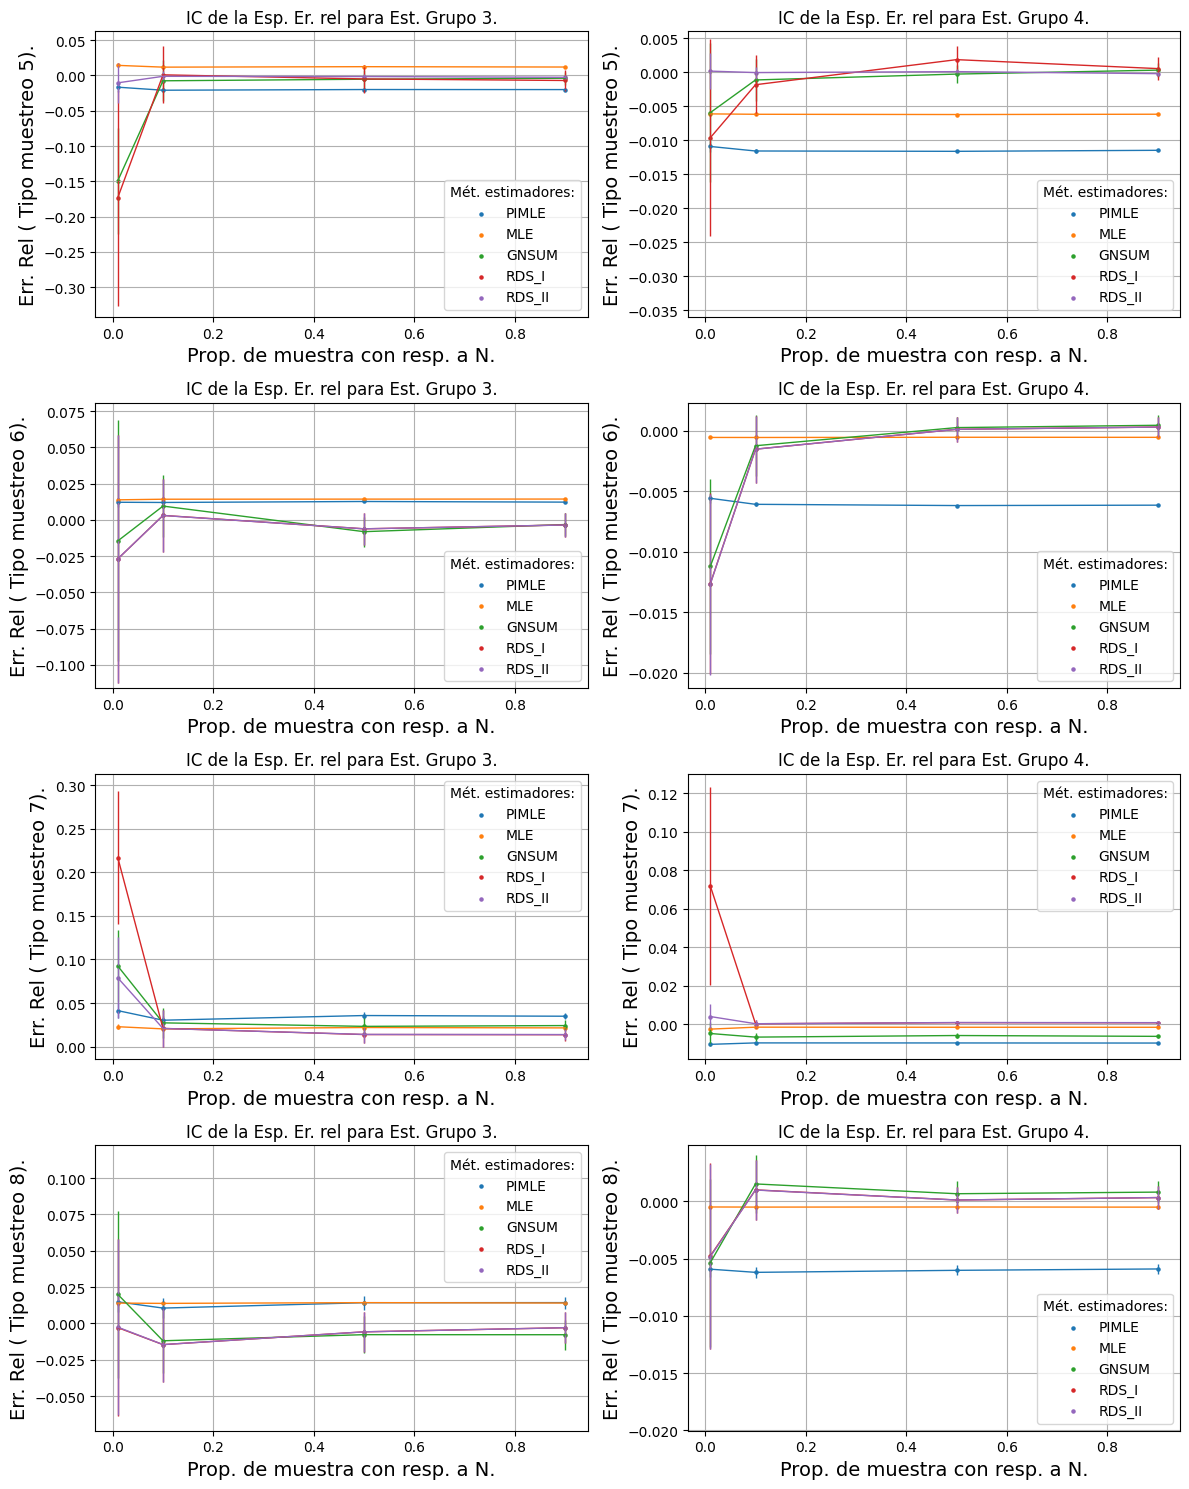

In [16]:
size_figure=(12,15)
l_ylim=[[-1.5,0.1],[-0.45,0.1],[-0.45,0.1],[-0.45,0.1]]
dict_met_to_ylim={u:v for u,v in zip(L_prop_sample,l_ylim)}


# dict_2:
l_position=["lower right","lower right","lower right","lower right","upper right","upper right","upper right","lower right"]
dict_position_legend={(u[0],u[1]):z for u,z in zip(list_cuadr_graphics,l_position) }

# dict_3:
l_y_lim=[(-0.34209466195611027, 0.062394679063943706),
  (-0.11620716121594218, 0.08099313755677157),
  (-0.01471140646460674, 0.31287822666143356),
  (-0.07382975915225008, 0.12264295553226723),
  (-0.035986803108290206, 0.006025494393901969),
  (-0.021300494334075618, 0.0023432225647828176),
  (-0.0181556125573869, 0.130055619822204),
  (-0.020039472993423538, 0.004915317921713292)]
dict_y_lim={(u[0],u[1]):z for u,z in zip(list_cuadr_graphics_v2,l_y_lim) }

cond_grupo_1=df_experimentacion['Etiqueta H']==l_grupos[3]
cond_grupo_2=df_experimentacion['Etiqueta H']==l_grupos[4]
l_cond=[cond_grupo_1,cond_grupo_2]

l_name_grupo=["Grupo 3","Grupo 4"]
graficar_IC(df_experimentacion,l_cond,dict_met_to_ylim,size_figure,l_name_grupo,dict_position_legend,dict_y_lim)

([(-0.1870492615965218, 0.07414555421781634),
  (-0.03465890808935335, 0.10231426691534955),
  (-0.05655542125602648, 0.27687882037037354),
  (-0.08384994552642082, 0.060460024639686784),
  (-1.39638436571538, 0.1295375703217601),
  (-0.4074348541167572, 0.16562918189833142),
  (-0.8413694425241055, 1.1),
  (-0.4248750782485646, 0.55)],
 [(0, 0), (1, 0), (2, 0), (3, 0), (0, 1), (1, 1), (2, 1), (3, 1)])

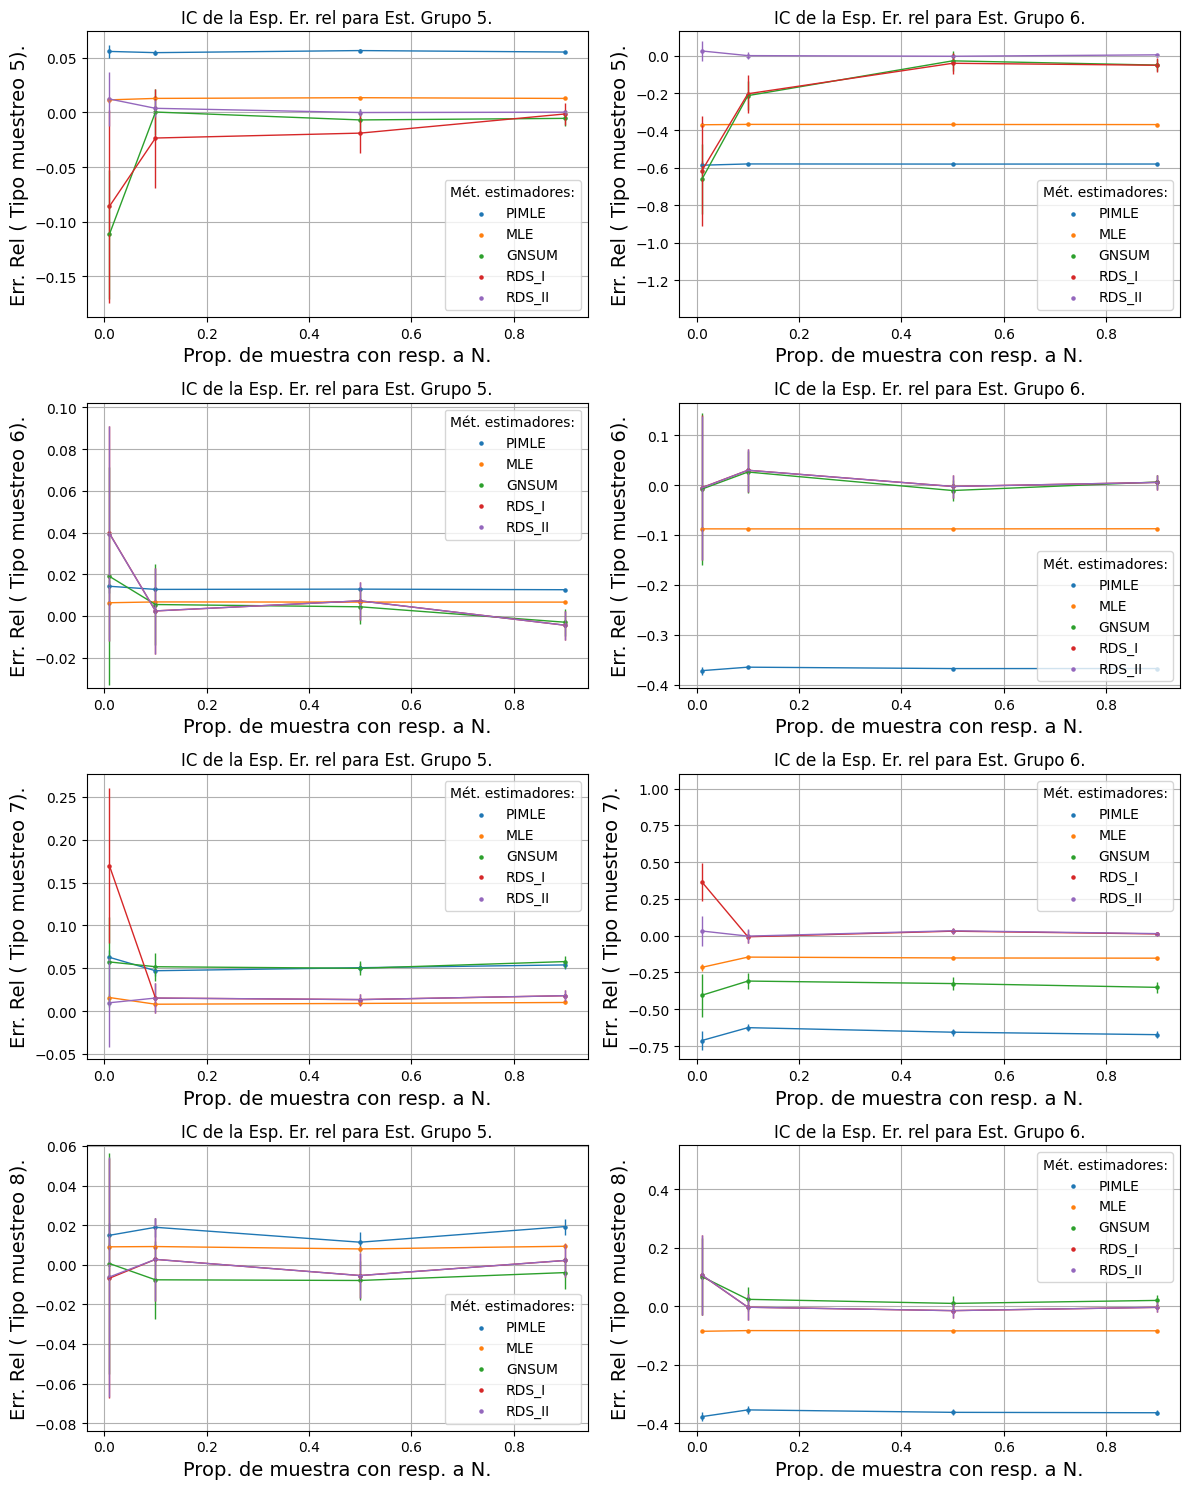

In [17]:
size_figure=(12,15)
l_ylim=[[-1.5,0.1],[-0.45,0.1],[-0.45,0.1],[-0.45,0.1]]
dict_met_to_ylim={u:v for u,v in zip(L_prop_sample,l_ylim)}

l_position=["lower right","lower right","upper right","lower right","upper right","upper right","lower right","upper right"]
dict_position_legend={(u[0],u[1]):z for u,z in zip(list_cuadr_graphics,l_position) }

# dict_3:
l_y_lim=[(-0.1870492615965218, 0.07414555421781634),
  (-0.03465890808935335, 0.10231426691534955),
  (-0.05655542125602648, 0.27687882037037354),
  (-0.08384994552642082, 0.060460024639686784),
  (-1.39638436571538, 0.1295375703217601),
  (-0.4074348541167572, 0.16562918189833142),
  (-0.8413694425241055, 1.1),
  (-0.4248750782485646, 0.55)]
dict_y_lim={(u[0],u[1]):z for u,z in zip(list_cuadr_graphics_v2,l_y_lim) }

cond_grupo_1=df_experimentacion['Etiqueta H']==l_grupos[5]
cond_grupo_2=df_experimentacion['Etiqueta H']==l_grupos[6]
l_cond=[cond_grupo_1,cond_grupo_2]

l_name_grupo=["Grupo 5","Grupo 6"]
graficar_IC(df_experimentacion,l_cond,dict_met_to_ylim,size_figure,l_name_grupo,dict_position_legend,dict_y_lim)

([(-1.0832850197690198, 0.2203332416617908),
  (-0.15518594974933225, 0.17188732519515465),
  (-0.11768123694422547, 0.5640780397318128),
  (-0.10960383995622484, 0.28876975008302613),
  (-1.0832850197690198, 0.2203332416617908),
  (-0.15518594974933225, 0.17188732519515465),
  (-0.11768123694422547, 0.5640780397318128),
  (-0.10960383995622484, 0.28876975008302613)],
 [(0, 0), (1, 0), (2, 0), (3, 0), (0, 1), (1, 1), (2, 1), (3, 1)])

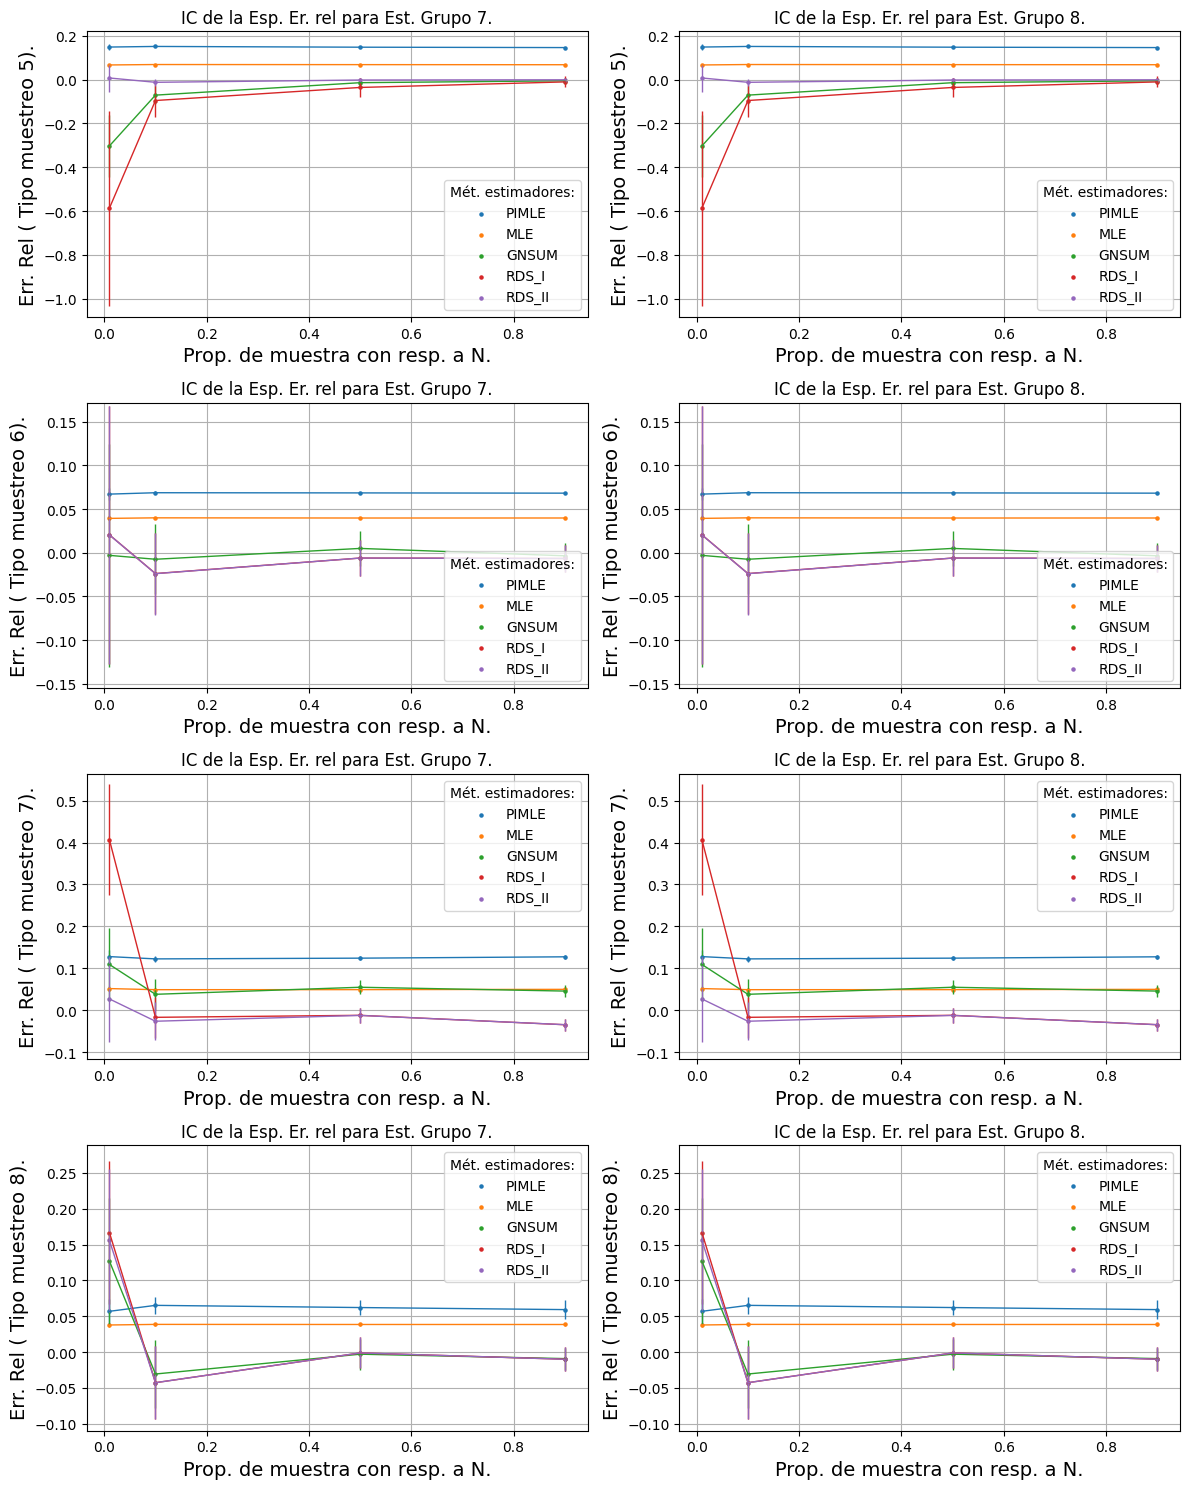

In [18]:
size_figure=(12,15)
l_ylim=[[-1.5,0.1],[-0.45,0.1],[-0.45,0.1],[-0.45,0.1]]
dict_met_to_ylim={u:v for u,v in zip(L_prop_sample,l_ylim)}

l_position=["lower right","lower right","lower right","lower right","upper right","upper right","upper right","upper right"]
dict_position_legend={(u[0],u[1]):z for u,z in zip(list_cuadr_graphics,l_position) }

# dict_3:
l_y_lim=[(-1.0832850197690198, 0.2203332416617908),
  (-0.15518594974933225, 0.17188732519515465),
  (-0.11768123694422547, 0.5640780397318128),
  (-0.10960383995622484, 0.28876975008302613),
  (-1.0832850197690198, 0.2203332416617908),
  (-0.15518594974933225, 0.17188732519515465),
  (-0.11768123694422547, 0.5640780397318128),
  (-0.10960383995622484, 0.28876975008302613)]
dict_y_lim={(u[0],u[1]):z for u,z in zip(list_cuadr_graphics_v2,l_y_lim) }

cond_grupo_1=df_experimentacion['Etiqueta H']==l_grupos[7]
cond_grupo_2=df_experimentacion['Etiqueta H']==l_grupos[7]
l_cond=[cond_grupo_1,cond_grupo_2]

l_name_grupo=["Grupo 7","Grupo 8"]
graficar_IC(df_experimentacion,l_cond,dict_met_to_ylim,size_figure,l_name_grupo,dict_position_legend,dict_y_lim)